In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from labMTsimple.speedy import sentiDict
import datetime
def mysavefig(name,date=True):
    if date:
        plt.savefig('{0}-{1}'.format(datetime.datetime.strftime(datetime.datetime.now(),'%Y-%m-%d-%H-%M'),name))
    else:
        plt.savefig('{1}'.format(name))

In [2]:
LIWC = sentiDict('LIWC',stopVal=0.0)
LabMT = sentiDict('LabMT')
print(len(LIWC.data))
print(len(LabMT.data))
LIWCtrie = sentiDict('LIWC',datastructure='marisatrie',stopVal=0.0)
LabMTtrie = sentiDict('LabMT',datastructure='marisatrie',stopVal=0.0)
print(len(LIWCtrie.data[0]))
print(len(LIWCtrie.data[1]))
print(len(LabMTtrie.data))

1366
10222
722
644
2


1379
1379
[(6.51, 1.0), (5.4, 0.0), (3.71, 0.0), (2.98, -1.0), (6.52, 0.0), (2.84, -1.0), (7.22, 1.0), (5.14, 0.0), (3.04, -1.0), (5.1, 0.0)]
['amore', 'main', 'lacking', 'confused', 'extra', 'hater', 'encouraging', "y'all", 'horror', 'these']


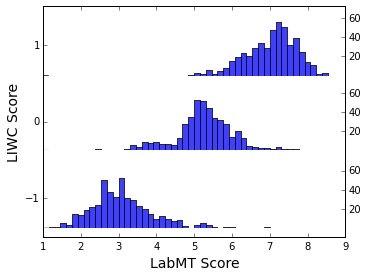

In [3]:
def scatter1(set1,set2,fig):
    # now go and make the triple histogram!
    overlapWords = []
    overlapScores = []
    for word,index in set1.items():
            if word in set2[0]:
                LIWCscore = set2[0].get(word)[0][0]
                overlapWords.append(word)
                overlapScores.append((index[0],LIWCscore))
            elif len(set2[1].prefixes(word)) > 0:
                LIWCscore = set2[1].get(set2[1].prefixes(word)[0])[0][0]
                overlapWords.append(word)
                overlapScores.append((index[0],LIWCscore))
    print(len(overlapWords))
    print(len(overlapScores))
    print(overlapScores[:10])
    print(overlapWords[:10])
    overlapScoresSplit = [[],[],[]]
    overlapWordsSplit = [[],[],[]]
    for i,word in zip(range(len(overlapWords)),overlapWords):
        if overlapScores[i][1] == -1:
            overlapScoresSplit[0].append(overlapScores[i][0])
            overlapWordsSplit[0].append(word)
        elif overlapScores[i][1] == 1:
            overlapScoresSplit[2].append(overlapScores[i][0])
            overlapWordsSplit[2].append(word)
        else:
            overlapScoresSplit[1].append(overlapScores[i][0])
            overlapWordsSplit[1].append(word)
    nbins = np.linspace(1,9,8./.15)

    ax1 = fig.add_axes([0.15,0.18,0.7,0.2],frame_on=False)
    ax1.hist(overlapScoresSplit[0],bins=nbins,alpha=0.75)
    ax1.set_xlim([1,9])
    ax1.set_xticks([])
    ax1.set_yticks([20,40,60])
    ax1.yaxis.set_ticks_position('right')
    ax2 = fig.add_axes([0.15,0.45,0.7,0.2],frame_on=False)
    ax2.hist(overlapScoresSplit[1],bins=nbins,alpha=0.75)
    ax2.set_xlim([1,9])
    ax2.set_xticks([])
    # ax2.set_yticks([50,150,250])
    ax2.set_yticks([20,40,60])
    ax2.yaxis.set_ticks_position('right')
    ax3 = fig.add_axes([0.15,0.71,0.7,0.2],frame_on=False)
    ax3.hist(overlapScoresSplit[2],bins=nbins,alpha=0.75)
    ax3.set_xlim([1,9])
    # ax3.xaxis.set_ticks_position('top')
    ax3.yaxis.set_ticks_position('right')
    ax3.set_xticks([])
    ax3.set_yticks([20,40,60])

fig = plt.figure()
ax4 = fig.add_axes([0.15,0.15,0.7,0.8])
ax4.set_ylim([-1.5,1.5])
ax4.set_yticks([-1,0,1])
ax4.set_xlim([1,9])
ax4.yaxis.set_ticks_position('left')
ax4.set_ylabel('LIWC Score',fontsize=14)
ax4.set_xlabel('LabMT Score',fontsize=14)
scatter1(LabMT.data,LIWCtrie.data,fig)
mysavefig('LIWC-LabMT-scatter.pdf')

In [5]:
from labMTsimple.storyLab import *
# make a shift by rating a corpus that is only the LIWC words that ma

# for the pos, neg ones, shift against the mean....
labMT,labMTvector,labMTwordList = emotionFileReader(stopval = 0.0, returnVector=True)

# see the example file, but assuming there are two strings to score
# named "saturday" and "tuesday", generate their word frequency vectors
# valence,fvec = emotion(' '.join(overlapWordsSplit[0]),labMT,shift=True,happsList=labMTvector)

# apply the traditional lens to the frequency vectors
# this sets the frequency of words with score between
# 4 and 6 (corresponding to stopval of 1)
# stoppedVec = stopper(fvec,labMTvector,labMTwordList,stopVal=1.0)

# generate an html file
# and make a static directory
# shiftHtmlSelf(labMTvector,labMTwordList,fvec,"negwords.html")

# valence,fvec = emotion(' '.join(overlapWordsSplit[1]),labMT,shift=True,happsList=labMTvector)
# shiftHtmlSelf(labMTvector,labMTwordList,fvec,"neutralwords.html")
# valence,fvec = emotion(' '.join(overlapWordsSplit[2]),labMT,shift=True,happsList=labMTvector)
# shiftHtmlSelf(labMTvector,labMTwordList,fvec,"poswords.html")

In [6]:
LabMT = sentiDict('LabMT')
Warriner = sentiDict('Warriner')
print(LabMT.data['happy'])
print(Warriner.data['happy'])

(8.3, 3, 0.9949)
(8.47, 5596, 1.28)


4502
4502
4502
[(5.4, 5.27), (5.4, 4.95), (2.98, 3.11), (6.76, 7.26), (6.52, 6.39), (5.42, 4.92), (5.92, 5.58), (5.76, 5.74), (2.84, 2.33), (6.04, 5.72)]
[(1.2122, 1.16), (1.0102, 1.72), (1.2856, 1.52), (1.8245, 1.33), (1.4032, 1.72), (1.295, 1.24), (1.3679, 1.47), (0.9806, 1.12), (1.8775, 1.32), (1.4563, 2.16)]
['main', 'headquarters', 'confused', 'popcorn', 'extra', 'barrel', 'salon', 'lamp', 'hater', 'professor']
Beta: [ 1.02511414 -0.20676337]
Beta Std Error: [ 0.00626956  0.03534565]
Beta Covariance: [[ 0.00058586 -0.00322811]
 [-0.00322811  0.01862037]]
Residual Variance: 0.06709397551954126
Inverse Condition #: 0.0037018767211594076
Reason(s) for Halting:
  Sum of squares convergence
4502
4502
4502
[(5.4, 5.27), (5.4, 4.95), (2.98, 3.11), (6.76, 7.26), (6.52, 6.39), (5.42, 4.92), (5.92, 5.58), (5.76, 5.74), (2.84, 2.33), (6.04, 5.72)]
[(1.2122, 1.16), (1.0102, 1.72), (1.2856, 1.52), (1.8245, 1.33), (1.4032, 1.72), (1.295, 1.24), (1.3679, 1.47), (0.9806, 1.12), (1.8775, 1.32), (1

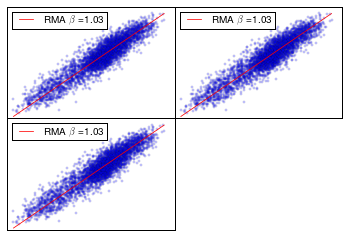

In [28]:
# http://stackoverflow.com/questions/16126884/python-scipy-odrpack-odr-example-with-sample-input-output
import scipy.odr.odrpack as odrpack

def f(B, x):
    return B[0]*x + B[1]

linear = odrpack.Model(f)

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

def scatter2(set1,set2,ax):
    overlapWords = []
    overlapScores = []
    overlapScoresStd = []
    for word,index in set1.items():
        if word in set2:
            overlapScores.append((index[0],set2[word][0]))
            overlapScoresStd.append((index[2],set2[word][2]))
            overlapWords.append(word)
    print(len(overlapWords))
    print(len(overlapScores))
    print(len(overlapScoresStd))
    print(overlapScores[:10])
    print(overlapScoresStd[:10])
    print(overlapWords[:10])

    set1scores = [x[0] for x in overlapScores]
    set1scoresStd = [x[0] for x in overlapScoresStd]
    set2scores = [x[1] for x in overlapScores]
    set2scoresStd = [x[0] for x in overlapScoresStd]
    
    # ordinary least squares
    # mydata = odrpack.RealData(set1scores, set2scores) #, sx=sx, sy=sy)
    # RMA
    mydata = odrpack.RealData(set1scores, set2scores, sx=set1scoresStd, sy=set2scoresStd)

    myodr = odrpack.ODR(mydata, linear, beta0=[1., 0.])
    myoutput = myodr.run()
    myoutput.pprint()
    # print(myoutput.beta)
    # print(myoutput.sd_beta)
    
    ax.scatter(set1scores,set2scores,alpha=0.25,marker='o',s=6,linewidth=0.2,edgecolor='k')
    
    x = np.linspace(min(set1scores),max(set1scores),num=100)
    ax.plot(x,myoutput.beta[0]*x+myoutput.beta[1],'r',linewidth=0.75)
    
    ax.legend(['RMA $\\beta$ ={0:.2f}'.format(myoutput.beta[0])],loc='best',fontsize=10)

    # ax1.set_xlabel('LabMT',fontsize=14)
    # ax1.set_ylabel('Warriner',fontsize=14)
    ax.set_xlim([1,9])
    ax.set_ylim([1,9])
    ax.set_xticks([])
    ax.set_yticks([])
    # mysavefig('Warriner-LabMT.pdf')
    
fig = plt.figure()
ax1 = fig.add_axes([0.15,0.15,0.7,0.7])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
ax2 = plt.subplot(2,2,1)
scatter2(LabMT.data,Warriner.data,ax2)
ax3 = plt.subplot(2,2,2)
scatter2(LabMT.data,Warriner.data,ax3)
ax4 = plt.subplot(2,2,3)
scatter2(LabMT.data,Warriner.data,ax4)
# ax5 = plt.subplot(2,2,4)
# scatter1(LabMT.data,LIWCtrie.data,fig)

In [99]:
def scatter3(set1,set2,axlist):
    # now go and make the triple histogram!
    overlapWords = []
    overlapScores = []
    for word,index in set1.items():
            if word in set2[0]:
                LIWCscore = set2[0].get(word)[0][0]
                overlapWords.append(word)
                overlapScores.append((index[0],LIWCscore))
            elif len(set2[1].prefixes(word)) > 0:
                LIWCscore = set2[1].get(set2[1].prefixes(word)[0])[0][0]
                overlapWords.append(word)
                overlapScores.append((index[0],LIWCscore))
    print(len(overlapWords))
    print(len(overlapScores))
    print(overlapScores[:10])
    print(overlapWords[:10])
    overlapScoresSplit = [[],[],[]]
    overlapWordsSplit = [[],[],[]]
    for i,word in zip(range(len(overlapWords)),overlapWords):
        if overlapScores[i][1] == -1:
            overlapScoresSplit[0].append(overlapScores[i][0])
            overlapWordsSplit[0].append(word)
        elif overlapScores[i][1] == 1:
            overlapScoresSplit[2].append(overlapScores[i][0])
            overlapWordsSplit[2].append(word)
        else:
            overlapScoresSplit[1].append(overlapScores[i][0])
            overlapWordsSplit[1].append(word)
    nbins = np.linspace(1,9,8./.15)
    print(np.shape(overlapScoresSplit))
    print(np.shape(overlapWordsSplit))

    ax1 = axlist[0]
    ax1.hist(overlapScoresSplit[0],bins=nbins,alpha=0.75)
    ax1.set_xlim([1,9])
    ax1.set_xticks([])
    # ax1.set_yticks([20,40,60])
    ax1.set_yticks([])
    ax1.yaxis.set_ticks_position('right')
    ax2 = axlist[1]
    if len(overlapScoresSplit[1]) > 0:
        ax2.hist(overlapScoresSplit[1],bins=nbins,alpha=0.75)
    ax2.set_xlim([1,9])
    ax2.set_xticks([])
    # ax2.set_yticks([50,150,250])
    # ax2.set_yticks([20,40,60])
    ax2.set_yticks([])
    ax2.yaxis.set_ticks_position('right')
    ax3 = axlist[2]
    ax3.hist(overlapScoresSplit[2],bins=nbins,alpha=0.75)
    ax3.set_xlim([1,9])
    # ax3.xaxis.set_ticks_position('top')
    ax3.yaxis.set_ticks_position('right')
    ax3.set_xticks([])
    # ax3.set_yticks([20,40,60])
    ax3.set_ylim([0,60])
    ax3.set_yticks([])
    
    axlims = (ax1.get_ylim()[1],ax2.get_ylim()[1],ax3.get_ylim()[1])
    print(axlims)
    maxylim = np.max(axlims)
    ax1.set_ylim([0,maxylim])
    ax2.set_ylim([0,maxylim])
    ax3.set_ylim([0,maxylim])
    
    return maxylim

4502
4502
4502
[(5.4, 5.27), (5.4, 4.95), (2.98, 3.11), (6.76, 7.26), (6.52, 6.39), (5.42, 4.92), (5.92, 5.58), (5.76, 5.74), (2.84, 2.33), (6.04, 5.72)]
[(1.2122, 1.16), (1.0102, 1.72), (1.2856, 1.52), (1.8245, 1.33), (1.4032, 1.72), (1.295, 1.24), (1.3679, 1.47), (0.9806, 1.12), (1.8775, 1.32), (1.4563, 2.16)]
['main', 'headquarters', 'confused', 'popcorn', 'extra', 'barrel', 'salon', 'lamp', 'hater', 'professor']
Beta: [ 1.02511414 -0.20676337]
Beta Std Error: [ 0.00626956  0.03534565]
Beta Covariance: [[ 0.00058586 -0.00322811]
 [-0.00322811  0.01862037]]
Residual Variance: 0.06709397551954126
Inverse Condition #: 0.0037018767211594076
Reason(s) for Halting:
  Sum of squares convergence
4502
4502
4502
[(5.4, 5.27), (5.4, 4.95), (2.98, 3.11), (6.76, 7.26), (6.52, 6.39), (5.42, 4.92), (5.92, 5.58), (5.76, 5.74), (2.84, 2.33), (6.04, 5.72)]
[(1.2122, 1.16), (1.0102, 1.72), (1.2856, 1.52), (1.8245, 1.33), (1.4032, 1.72), (1.295, 1.24), (1.3679, 1.47), (0.9806, 1.12), (1.8775, 1.32), (1

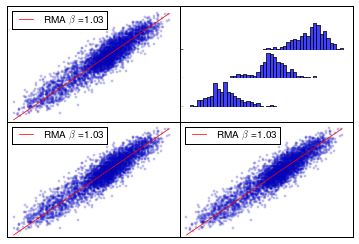

In [33]:
fig = plt.figure()
# ax1 = fig.add_axes([0.15,0.15,0.7,0.7])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
# ax2 = plt.subplot(2,2,1)
ax1 = fig.add_axes([0.1,0.1,0.4,0.4])
scatter2(LabMT.data,Warriner.data,ax1)
ax2 = fig.add_axes([0.5,0.1,0.4,0.4])
scatter2(LabMT.data,Warriner.data,ax2)
ax3 = fig.add_axes([0.1,0.5,0.4,0.4])
scatter2(LabMT.data,Warriner.data,ax3)
ax4 = fig.add_axes([0.5,0.5,0.4,0.4])
ax4.set_xticks([])
ax4.set_yticks([])
axlist = [fig.add_axes([0.5,0.55,0.4,0.1],frame_on=False),fig.add_axes([0.5,0.65,0.4,0.1],frame_on=False),fig.add_axes([0.5,0.75,0.4,0.1],frame_on=False),]
scatter3(LabMT.data,LIWCtrie.data,axlist)

1 0
LabMT Warriner
full full
[0.07, 0.6699999999999999, 0.3, 0.3]
4502
4502
4502
[(5.4, 5.27), (5.4, 4.95), (2.98, 3.11), (6.76, 7.26), (6.52, 6.39), (5.42, 4.92), (5.92, 5.58), (5.76, 5.74), (2.84, 2.33), (6.04, 5.72)]
[(1.2122, 1.16), (1.0102, 1.72), (1.2856, 1.52), (1.8245, 1.33), (1.4032, 1.72), (1.295, 1.24), (1.3679, 1.47), (0.9806, 1.12), (1.8775, 1.32), (1.4563, 2.16)]
['main', 'headquarters', 'confused', 'popcorn', 'extra', 'barrel', 'salon', 'lamp', 'hater', 'professor']
Beta: [ 1.02511414 -0.20676337]
Beta Std Error: [ 0.00626956  0.03534565]
Beta Covariance: [[ 0.00058586 -0.00322811]
 [-0.00322811  0.01862037]]
Residual Variance: 0.06709397551954126
Inverse Condition #: 0.0037018767211594076
Reason(s) for Halting:
  Sum of squares convergence
2 0
LabMT ANEW
full full
[0.07, 0.37, 0.3, 0.3]
702
702
702
[(2.98, 3.21), (5.42, 5.05), (5.76, 5.41), (2.9, 1.92), (5.74, 5.31), (5.48, 5.17), (3.04, 2.76), (2.54, 3.34), (7.16, 7.68), (5.8, 5.2)]
[(1.2856, 1.51), (1.295, 1.46), (0.9

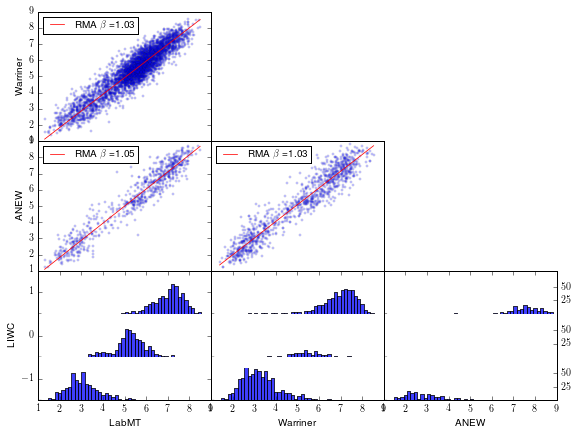

In [31]:
LabMT = sentiDict('LabMT')
Warriner = sentiDict('Warriner')
ANEW = sentiDict('ANEW')
MPQA = sentiDict('MPQA')
Liu = sentiDict('Liu')
fig = plt.figure(figsize=(8, 6))
compList = ['LabMT','Warriner','ANEW','LIWC']
dataList = [LabMT.data,Warriner.data,ANEW.data,LIWCtrie.data]
types = ['full','full','full','integer']
# this will be 2x2
plotsize = len(compList)-1
# whole figure label padding
xpad = .07
ypad = .07
xpadr = .03
ypadr = .03
# remaining width
xrem = 1.-xpad-xpadr
yrem = 1.-ypad-ypadr
# divide it up
xwidth = xrem/plotsize
ywidth = xrem/plotsize
# go down
for i in range(1,plotsize+1):
    for j in range(0,i):
        print(i,j)
        print(compList[j],compList[i])
        print(types[j],types[i])
        rect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth,xwidth,ywidth]
        print(rect)
        if types[j] == 'full' and types[i] == 'full':
            ax = fig.add_axes(rect)
            scatter2(dataList[j],dataList[i],ax)
        elif types[j] == 'full' and types[i] == 'integer':
            # take the rectangle, divide into three vertically
            ax = fig.add_axes(rect)
            if i == plotsize:
                ax.set_xlim([1,9])
                ax.set_xlabel(compList[j])
            else:
                ax.set_xticks([])
            ax.set_yticks([])
            negrect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth,xwidth,ywidth/4.]
            neurect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth+ywidth/3.,xwidth,ywidth/4.]
            posrect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth+2*ywidth/3.,xwidth,ywidth/4.]
            axlist = (fig.add_axes(negrect,frame_on=False),fig.add_axes(neurect,frame_on=False),fig.add_axes(posrect,frame_on=False))
            print('using scatter3')
            # print(rectlist)
            scatter3(dataList[j],dataList[i],axlist)
            if j == (i-1):
                axlist[0].set_yticks([25,50])
                axlist[1].set_yticks([25,50])
                axlist[2].set_yticks([25,50])
        else:
            ax = fig.add_axes(rect)
            scatter2(LabMT.data,Warriner.data,ax)
        if j == 0:
            ax.set_ylabel(compList[i])
            if types[i] == 'full':
                ax.set_ylim([1,9])
                ax.set_yticks(range(1,10))
            if types[i] == 'integer':
                ax.set_ylim([-1.5,1.5])
                ax.set_yticks([-1,0,1])
mysavefig('scatter-all.pdf')

In [13]:
import scipy.odr.odrpack as odrpack
np.random.seed(1)

N = 100
x = np.linspace(0,10,N)
y = 3*x - 1 + np.random.random(N)
sx = np.random.random(N)
sy = np.random.random(N)

def f(B, x):
    return B[0]*x + B[1]

linear = odrpack.Model(f)

# mydata = odrpack.Data(x, y, wd=1./np.power(sx,2), we=1./np.power(sy,2))
mydata = odrpack.RealData(x, y, sx=sx, sy=sy)

myodr = odrpack.ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()
myoutput.pprint()
print(myoutput.beta)
print(myoutput.sd_beta)

Beta: [ 3.02012868 -0.63168767]
Beta Std Error: [ 0.01188346  0.05616457]
Beta Covariance: [[ 0.00067276 -0.00267082]
 [-0.00267082  0.01502791]]
Residual Variance: 0.20990666070257405
Inverse Condition #: 0.1059812340712691
Reason(s) for Halting:
  Sum of squares convergence
[ 3.02012868 -0.63168767]
[ 0.01188346  0.05616457]


1231
1231
[(-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0), (0.0, -1.0), (-1.0, -1.0), (-1.0, -1.0), (0.0, -1.0), (1.0, 1.0), (1.0, 1.0)]
['insincerely', 'insincere', 'insincerity', 'insultingly', 'insulting', 'insulted', 'insecure', 'insecurity', 'inspirational', 'inspiration']
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 567.   12.   14.]
 [ 136.   23.   92.]
 [  16.    9.  362.]]


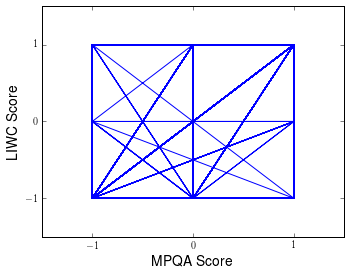

In [47]:
# now thinking about how to compare lexicon's with just the +/- 1
# really, there are 9 boxes
# could do area, make the whole thing 0-3 in both dimesions, and fill boxes based on percentages
# of course, this bidirectional!

# it gets really tricky with the stems
# everything has to be a trie
# only consider matches that are stable both ways
# that should make it one-directional
# then scale each box by the total in all 9 boxes
def scatter4(set1,set2,ax):
    overlapWords = []
    overlapScores = []
    for word,index in set1[0].items():
        if word in set2[0]:
            score = set2[0].get(word)[0][0]
            overlapWords.append(word)
            overlapScores.append((index[0],score))
        elif len(set2[1].prefixes(word)) > 0:
            score = set2[1].get(set2[1].prefixes(word)[0])[0][0]
            overlapWords.append(word)
            overlapScores.append((index[0],score))
    print(len(overlapWords))
    print(len(overlapScores))
    print(overlapScores[:10])
    print(overlapWords[:10])
    
    # NOW CHECK THAT THESE MATCHES ARE STABLE
    
    set1scores = [x[0] for x in overlapScores]
    set2scores = [x[1] for x in overlapScores]
    
    scoreBins = np.zeros((3,3))
    for i,score1 in zip(range(3),[-1,0,1]):
        for j,score2 in zip(range(3),[-1,0,1]):
            if overlapScores[0] == score1 and overlapScores[1] == score2:
                scoreBins[i,j] += 1
    # that doesn't work
    print(scoreBins)
    scores = [-1,0,1]
    for score in overlapScores:
        scoreBins[scores.index(score[0]),scores.index(score[1])] += 1
    print(scoreBins)
        
    
    ax.plot(set1scores,set2scores)
    
    # x = np.linspace(min(set1scores),max(set1scores),num=100)
    # ax.plot(x,myoutput.beta[0]*x+myoutput.beta[1],'r',linewidth=0.75)
    
    # ax.legend(['RMA $\\beta$ ={0:.2f}'.format(myoutput.beta[0])],loc='best',fontsize=10)

    # ax1.set_xlabel('LabMT',fontsize=14)
    # ax1.set_ylabel('Warriner',fontsize=14)
    # ax.set_xlim([1,9])
    # ax.set_ylim([1,9])
    # ax.set_xticks([])
    # ax.set_yticks([])

MPQAtrie = sentiDict('MPQA',datastructure='marisatrie')
fig = plt.figure()
ax4 = fig.add_axes([0.15,0.15,0.7,0.8])
ax4.set_ylim([-1.5,1.5])
ax4.set_yticks([-1,0,1])
ax4.set_xlim([-1.5,1.5])
ax4.set_xticks([-1,0,1])
# ax4.yaxis.set_ticks_position('left')
ax4.set_ylabel('LIWC Score',fontsize=14)
ax4.set_xlabel('MPQA Score',fontsize=14)
scatter4(MPQAtrie.data,LIWCtrie.data,ax4)
mysavefig('LIWC-MPQA-scatter.pdf')

5299
1605
1541
1541
[(-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0), (0.0, -1.0), (-1.0, -1.0), (-1.0, -1.0), (0.0, -1.0), (1.0, 1.0), (1.0, 1.0)]
['insincerely', 'insincere', 'insincerity', 'insultingly', 'insulting', 'insulted', 'insecure', 'insecurity', 'inspirational', 'inspiration']


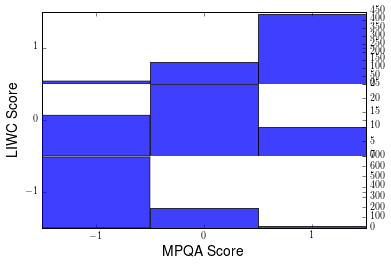

In [67]:
def scatter5(set1,set2,axlist,match_prefixes=False):
    overlapWords = []
    overlapScores = []
    for word,index in set1[0].items():
        # exact fixed matches
        if word in set2[0]:
            score = set2[0].get(word)[0][0]
            overlapWords.append(word)
            overlapScores.append((index[0],score))
        # this uses set2's stems to search set1's fixed words
        elif match_prefixes and len(set2[1].prefixes(word)) > 0:
            score = set2[1].get(set2[1].prefixes(word)[0])[0][0]
            overlapWords.append(word)
            overlapScores.append((index[0],score))
    for word,index in set1[1].items():
        # exact stem matches
        if word in set2[1]:
            score = set2[1].get(word)[0][0]
            overlapWords.append(word)
            overlapScores.append((index[0],score))
        # this allows set2's stems to match set1's stemmed words
        elif match_prefixes and len(set2[1].prefixes(word)) > 0:
            score = set2[1].get(set2[1].prefixes(word)[0])[0][0]
            overlapWords.append(word)
            overlapScores.append((index[0],score))
    print(len(overlapWords))
    print(len(overlapScores))
    print(overlapScores[:10])
    print(overlapWords[:10])
    
    overlapScoresSplit = [[],[],[]]
    overlapWordsSplit = [[],[],[]]
    for i,word in zip(range(len(overlapWords)),overlapWords):
        if overlapScores[i][1] == -1:
            overlapScoresSplit[0].append(overlapScores[i][0])
            overlapWordsSplit[0].append(word)
        elif overlapScores[i][1] == 1:
            overlapScoresSplit[2].append(overlapScores[i][0])
            overlapWordsSplit[2].append(word)
        else:
            overlapScoresSplit[1].append(overlapScores[i][0])
            overlapWordsSplit[1].append(word)
    # nbins = np.linspace(1,9,8./.15)
    # nbins = np.linspace(1,9,8./.15)
    # nbins = 3
    nbins = [-1.5,-.5,.5,1.5]
    
    ax1 = axlist[0]
    ax1.hist(overlapScoresSplit[0],bins=nbins,alpha=0.75)
    ax1.set_xlim([-1.5,1.5])
    ax1.set_xticks([])
    # ax1.set_yticks([20,40,60])
    # ax1.set_yticks([])
    ax1.yaxis.set_ticks_position('right')
    ax2 = axlist[1]
    ax2.hist(overlapScoresSplit[1],bins=nbins,alpha=0.75)
    ax2.set_xlim([-1.5,1.5])
    ax2.set_xticks([])
    # ax2.set_yticks([50,150,250])
    # ax2.set_yticks([20,40,60])
    # ax2.set_yticks([])
    ax2.yaxis.set_ticks_position('right')
    ax3 = axlist[2]
    ax3.hist(overlapScoresSplit[2],bins=nbins,alpha=0.75)
    ax3.set_xlim([-1.5,1.5])
    # ax3.xaxis.set_ticks_position('top')
    ax3.yaxis.set_ticks_position('right')
    ax3.set_xticks([])
    # ax3.set_yticks([20,40,60])
    # ax3.set_ylim([0,60])
    # ax3.set_yticks([])
    
    # x = np.linspace(min(set1scores),max(set1scores),num=100)
    # ax.plot(x,myoutput.beta[0]*x+myoutput.beta[1],'r',linewidth=0.75)
    
    # ax.legend(['RMA $\\beta$ ={0:.2f}'.format(myoutput.beta[0])],loc='best',fontsize=10)

    # ax1.set_xlabel('LabMT',fontsize=14)
    # ax1.set_ylabel('Warriner',fontsize=14)
    # ax.set_xlim([1,9])
    # ax.set_ylim([1,9])
    # ax.set_xticks([])
    # ax.set_yticks([])

MPQAtrie = sentiDict('MPQA',datastructure='marisatrie')
print(len(MPQAtrie.data[0]))
print(len(MPQAtrie.data[1]))
fig = plt.figure()
ax1 = fig.add_axes([0.15,0.15,0.75,0.75])
ax1.set_ylim([-1.5,1.5])
ax1.set_yticks([-1,0,1])
ax1.set_xlim([-1.5,1.5])
ax1.set_xticks([-1,0,1])
ax1.set_ylabel('LIWC Score',fontsize=14)
ax1.set_xlabel('MPQA Score',fontsize=14)
ax2 = fig.add_axes([0.15,0.15,0.75,0.25],frame_on=False)
ax3 = fig.add_axes([0.15,0.40,0.75,0.25],frame_on=False)
ax4 = fig.add_axes([0.15,0.65,0.75,0.25],frame_on=False)
scatter5(MPQAtrie.data,LIWCtrie.data,[ax2,ax3,ax4],match_prefixes=True)
mysavefig('MPQA-LIWC-scatter-w-prefixes.pdf')

284
284
[(-1.0, -1.0), (1.0, 1.0), (0.0, 0.0), (1.0, -1.0), (1.0, 1.0), (0.0, -1.0), (1.0, 1.0), (-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0)]
['impersonal', 'improving', 'immediately', 'stunned', 'super', 'suffering', 'sunny', 'seriously', 'seriousness', 'serious']


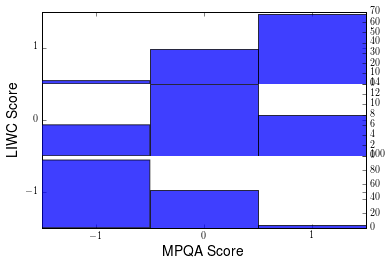

In [64]:
fig = plt.figure()
ax1 = fig.add_axes([0.15,0.15,0.75,0.75])
ax1.set_ylim([-1.5,1.5])
ax1.set_yticks([-1,0,1])
ax1.set_xlim([-1.5,1.5])
ax1.set_xticks([-1,0,1])
ax1.set_ylabel('LIWC Score',fontsize=14)
ax1.set_xlabel('MPQA Score',fontsize=14)
ax2 = fig.add_axes([0.15,0.15,0.75,0.25],frame_on=False)
ax3 = fig.add_axes([0.15,0.40,0.75,0.25],frame_on=False)
ax4 = fig.add_axes([0.15,0.65,0.75,0.25],frame_on=False)
scatter5(MPQAtrie.data,LIWCtrie.data,[ax2,ax3,ax4],match_prefixes=False)
mysavefig('MPQA-LIWC-scatter-wo-prefixes.pdf')

485
485
[(-1.0, -1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0)]
['shaky', "should'nt", "should've", "shouldn't", 'shouldnt', 'shouldve', 'should', 'such', 'supported', 'supporting']


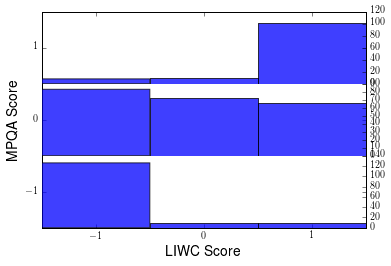

In [65]:
fig = plt.figure()
ax1 = fig.add_axes([0.15,0.15,0.75,0.75])
ax1.set_ylim([-1.5,1.5])
ax1.set_yticks([-1,0,1])
ax1.set_xlim([-1.5,1.5])
ax1.set_xticks([-1,0,1])
ax1.set_ylabel('MPQA Score',fontsize=14)
ax1.set_xlabel('LIWC Score',fontsize=14)
ax2 = fig.add_axes([0.15,0.15,0.75,0.25],frame_on=False)
ax3 = fig.add_axes([0.15,0.40,0.75,0.25],frame_on=False)
ax4 = fig.add_axes([0.15,0.65,0.75,0.25],frame_on=False)
scatter5(LIWCtrie.data,MPQAtrie.data,[ax2,ax3,ax4],match_prefixes=True)
mysavefig('LIWC-MPQA-scatter-w-prefixes.pdf')

284
284
[(-1.0, -1.0), (1.0, 1.0), (-1.0, 0.0), (1.0, 1.0), (-1.0, -1.0), (-1.0, 1.0), (-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0)]
['shaky', 'super', 'suffering', 'sunny', 'sorry', 'stunned', 'seriously', 'seriousness', 'serious', 'sinister']


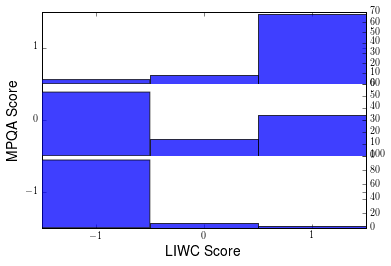

In [66]:
fig = plt.figure()
ax1 = fig.add_axes([0.15,0.15,0.75,0.75])
ax1.set_ylim([-1.5,1.5])
ax1.set_yticks([-1,0,1])
ax1.set_xlim([-1.5,1.5])
ax1.set_xticks([-1,0,1])
ax1.set_ylabel('MPQA Score',fontsize=14)
ax1.set_xlabel('LIWC Score',fontsize=14)
ax2 = fig.add_axes([0.15,0.15,0.75,0.25],frame_on=False)
ax3 = fig.add_axes([0.15,0.40,0.75,0.25],frame_on=False)
ax4 = fig.add_axes([0.15,0.65,0.75,0.25],frame_on=False)
scatter5(LIWCtrie.data,MPQAtrie.data,[ax2,ax3,ax4],match_prefixes=False)
mysavefig('LIWC-MPQA-scatter-wo-prefixes.pdf')

## could make the bars be stacked with the separate prefix/nonprefix match

this would make two charts instead of four

5299
1605
284
284
[(-1.0, -1.0), (1.0, 1.0), (0.0, 0.0), (1.0, -1.0), (1.0, 1.0), (0.0, -1.0), (1.0, 1.0), (-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0)]
['impersonal', 'improving', 'immediately', 'stunned', 'super', 'suffering', 'sunny', 'seriously', 'seriousness', 'serious']
1257
1257
[(-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0), (-1.0, -1.0), (0.0, -1.0), (-1.0, -1.0), (-1.0, -1.0), (0.0, -1.0), (1.0, 1.0), (1.0, 1.0)]
['insincerely', 'insincere', 'insincerity', 'insultingly', 'insulting', 'insulted', 'insecure', 'insecurity', 'inspirational', 'inspiration']
(700.0, 25.0, 450.0)


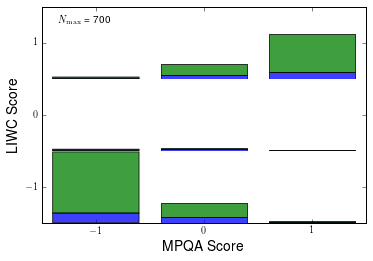

In [117]:
def scatter6(set1,set2,axlist):
    overlapWords = []
    overlapScores = []
    # capture the num of stem matches
    overlapWordsStem = []
    overlapScoresStem = []
    for word,index in set1[0].items():
        # exact fixed matches
        if word in set2[0]:
            score = set2[0].get(word)[0][0]
            overlapWords.append(word)
            overlapScores.append((index[0],score))
        # this uses set2's stems to search set1's fixed words
        elif len(set2[1].prefixes(word)) > 0:
            score = set2[1].get(set2[1].prefixes(word)[0])[0][0]
            overlapWordsStem.append(word)
            overlapScoresStem.append((index[0],score))
    for word,index in set1[1].items():
        # exact stem matches
        if word in set2[1]:
            score = set2[1].get(word)[0][0]
            overlapWords.append(word)
            overlapScores.append((index[0],score))
        # this allows set2's stems to match set1's stemmed words
        elif len(set2[1].prefixes(word)) > 0:
            score = set2[1].get(set2[1].prefixes(word)[0])[0][0]
            overlapWordsStem.append(word)
            overlapScoresStem.append((index[0],score))
    print(len(overlapWords))
    print(len(overlapScores))
    print(overlapScores[:10])
    print(overlapWords[:10])
    print(len(overlapWordsStem))
    print(len(overlapScoresStem))
    print(overlapScoresStem[:10])
    print(overlapWordsStem[:10])
    
    overlapScoresSplit = [[],[],[]]
    overlapWordsSplit = [[],[],[]]
    for i,word in zip(range(len(overlapWords)),overlapWords):
        if overlapScores[i][1] == -1:
            overlapScoresSplit[0].append(overlapScores[i][0])
            overlapWordsSplit[0].append(word)
        elif overlapScores[i][1] == 1:
            overlapScoresSplit[2].append(overlapScores[i][0])
            overlapWordsSplit[2].append(word)
        else:
            overlapScoresSplit[1].append(overlapScores[i][0])
            overlapWordsSplit[1].append(word)
    overlapScoresSplitStem = [[],[],[]]
    overlapWordsSplitStem = [[],[],[]]
    for i,word in zip(range(len(overlapWordsStem)),overlapWordsStem):
        if overlapScoresStem[i][1] == -1:
            overlapScoresSplitStem[0].append(overlapScoresStem[i][0])
            overlapWordsSplitStem[0].append(word)
        elif overlapScoresStem[i][1] == 1:
            overlapScoresSplitStem[2].append(overlapScoresStem[i][0])
            overlapWordsSplitStem[2].append(word)
        else:
            overlapScoresSplitStem[1].append(overlapScoresStem[i][0])
            overlapWordsSplitStem[1].append(word)

    nbins = [-1.5,-.5,.5,1.5]
    
    ax1 = axlist[0]
    ax1.hist([overlapScoresSplit[0],overlapScoresSplitStem[0]],bins=nbins,alpha=0.75,stacked=True)
    ax1.set_xlim([-1.5,1.5])
    ax1.set_xticks([])
    # ax1.set_yticks([20,40,60])
    ax1.set_yticks([])
    ax1.yaxis.set_ticks_position('right')
    ax2 = axlist[1]
    if len(overlapScoresSplit[1]) > 0:
        ax2.hist([overlapScoresSplit[1],overlapScoresSplitStem[1]],bins=nbins,alpha=0.75,stacked=True)
    ax2.set_xlim([-1.5,1.5])
    ax2.set_xticks([])
    # ax2.set_yticks([50,150,250])
    # ax2.set_yticks([20,40,60])
    ax2.set_yticks([])
    ax2.yaxis.set_ticks_position('right')
    ax3 = axlist[2]
    ax3.hist([overlapScoresSplit[2],overlapScoresSplitStem[2]],bins=nbins,alpha=0.75,stacked=True)
    ax3.set_xlim([-1.5,1.5])
    # ax3.xaxis.set_ticks_position('top')
    ax3.yaxis.set_ticks_position('right')
    ax3.set_xticks([])
    # ax3.set_yticks([20,40,60])
    # ax3.set_ylim([0,60])
    ax3.set_yticks([])
    
    axlims = (ax1.get_ylim()[1],ax2.get_ylim()[1],ax3.get_ylim()[1])
    print(axlims)
    maxylim = np.max(axlims)
    ax1.set_ylim([0,maxylim])
    ax2.set_ylim([0,maxylim])
    ax3.set_ylim([0,maxylim])
    
    # x = np.linspace(min(set1scores),max(set1scores),num=100)
    # ax.plot(x,myoutput.beta[0]*x+myoutput.beta[1],'r',linewidth=0.75)
    
    # ax.legend(['RMA $\\beta$ ={0:.2f}'.format(myoutput.beta[0])],loc='best',fontsize=10)

    # ax1.set_xlabel('LabMT',fontsize=14)
    # ax1.set_ylabel('Warriner',fontsize=14)
    # ax.set_xlim([1,9])
    # ax.set_ylim([1,9])
    # ax.set_xticks([])
    # ax.set_yticks([])
    
    return maxylim

MPQAtrie = sentiDict('MPQA',datastructure='marisatrie')
print(len(MPQAtrie.data[0]))
print(len(MPQAtrie.data[1]))
fig = plt.figure()
# plt.locator_params(axis = 'y', nbins = 3)
ax1 = fig.add_axes([0.15,0.15,0.75,0.75])
ax1.set_ylim([-1.5,1.5])
ax1.set_yticks([-1,0,1])
ax1.set_xlim([-1.5,1.5])
ax1.set_xticks([-1,0,1])
ax1.set_ylabel('LIWC Score',fontsize=14)
ax1.set_xlabel('MPQA Score',fontsize=14)
ax2 = fig.add_axes([0.15,0.15,0.75,0.25],frame_on=False)
ax3 = fig.add_axes([0.15,0.40,0.75,0.25],frame_on=False)
ax4 = fig.add_axes([0.15,0.65,0.75,0.25],frame_on=False)
maxylim = scatter6(MPQAtrie.data,LIWCtrie.data,[ax2,ax3,ax4])
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# ax1.text(0.05, 0.95, 'Max = {0:.0f}'.format(maxylim), transform=ax1.transAxes, fontsize=10,
#         verticalalignment='top', bbox=props)
ax1.text(0.05, 0.95, '$N_{{\max}}$ = {0:.0f}'.format(maxylim), transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=None)
# ax1.text(,'{0:.0f}'.format(maxylim),fontsize=10)
mysavefig('MPQA-LIWC-scatter-stacked.pdf')

0 0
LabMT LabMT
full full
[0.07, 0.8200000000000001, 0.15, 0.15]
10222
10222
10222
[(6.51, 6.51), (5.4, 5.4), (6.5, 6.5), (4.86, 4.86), (5.4, 5.4), (5.08, 5.08), (3.71, 3.71), (2.98, 2.98), (6.76, 6.76), (6.52, 6.52)]
[(1.7335, 1.7335), (1.2122, 1.2122), (1.5811, 1.5811), (1.125, 1.125), (1.0102, 1.0102), (1.1753, 1.1753), (1.633, 1.633), (1.2856, 1.2856), (1.8245, 1.8245), (1.4032, 1.4032)]
['amore', 'main', 'deals', 'hath', 'headquarters', 'hart', 'lacking', 'confused', 'popcorn', 'extra']
Beta: [ 1.  0.]
Beta Std Error: [ 0.  0.]
Beta Covariance: [[ 0.00031709 -0.00170341]
 [-0.00170341  0.00947221]]
Residual Variance: 0.0
Inverse Condition #: 0.0033228414597993787
Reason(s) for Halting:
  Sum of squares convergence
0 1
Warriner LabMT
full full
[0.22, 0.8200000000000001, 0.15, 0.15]
4502
4502
4502
[(3.11, 2.98), (6.39, 6.52), (4.92, 5.42), (5.74, 5.76), (2.33, 2.84), (5.72, 6.04), (6.89, 7.22), (5.27, 5.08), (6.14, 6.96), (3.78, 3.56)]
[(1.52, 1.2856), (1.72, 1.4032), (1.24, 1.295),

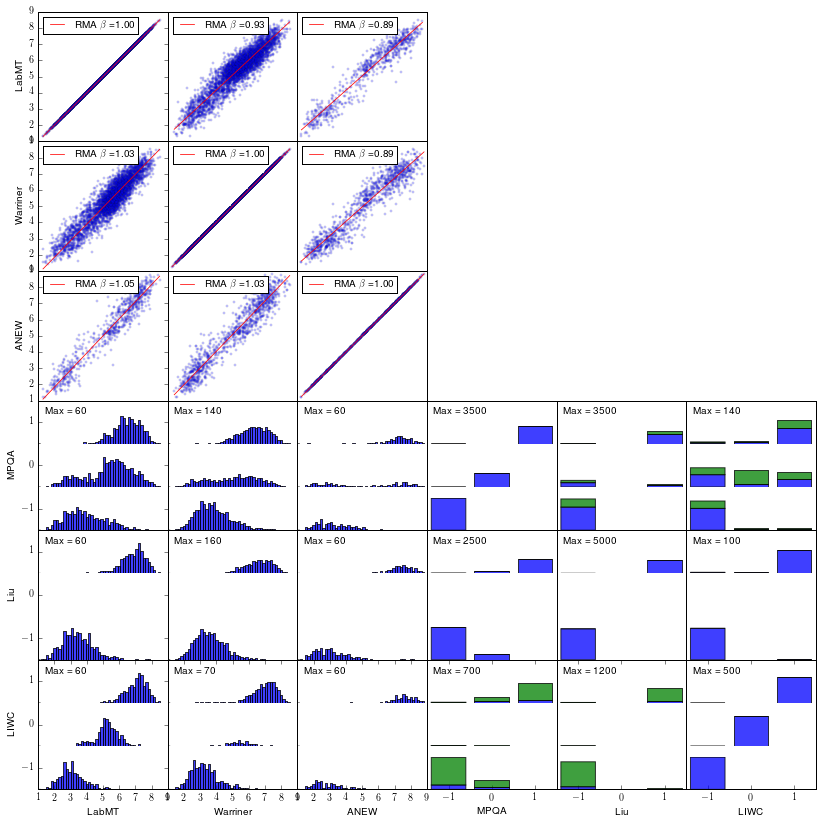

In [103]:
LabMT = sentiDict('LabMT')
Warriner = sentiDict('Warriner')
ANEW = sentiDict('ANEW')
MPQA = sentiDict('MPQA')
Liu = sentiDict('Liu')
Liutrie = sentiDict('Liu',datastructure='marisatrie')
fig = plt.figure(figsize=(12, 12))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
compList = ['LabMT','Warriner','ANEW','MPQA','Liu','LIWC']
dataList = [LabMT.data,Warriner.data,ANEW.data,MPQAtrie.data,Liutrie.data,LIWCtrie.data]
types = ['full','full','full','integer','integer','integer']
# this will be 2x2
plotsize = len(compList)-1
# whole figure label padding
xpad = .07
ypad = .07
xpadr = .03
ypadr = .03
# remaining width
xrem = 1.-xpad-xpadr
yrem = 1.-ypad-ypadr
# divide it up
xwidth = xrem/(plotsize+1)
ywidth = xrem/(plotsize+1)
# go down
for i in range(0,plotsize+1):
    for j in range(0,plotsize+1):
        print(i,j)
        print(compList[j],compList[i])
        print(types[j],types[i])
        rect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth,xwidth,ywidth]
        print(rect)
        if types[j] == 'full' and types[i] == 'full':
            ax = fig.add_axes(rect)
            scatter2(dataList[j],dataList[i],ax)
        elif types[j] == 'full' and types[i] == 'integer':
            # take the rectangle, divide into three vertically
            ax = fig.add_axes(rect)
            if i == plotsize:
                ax.set_xlim([1,9])
                ax.set_xlabel(compList[j])
            else:
                ax.set_xticks([])
            ax.set_yticks([])
            negrect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth,xwidth,ywidth/4.]
            neurect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth+ywidth/3.,xwidth,ywidth/4.]
            posrect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth+2*ywidth/3.,xwidth,ywidth/4.]
            axlist = (fig.add_axes(negrect,frame_on=False),fig.add_axes(neurect,frame_on=False),fig.add_axes(posrect,frame_on=False))
            print('using scatter3')
            # print(rectlist)
            maxylim = scatter3(dataList[j],dataList[i],axlist)
            ax.text(0.05, 0.95, 'Max = {0:.0f}'.format(maxylim), transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=None)
        elif types[j] == 'integer' and types[i] == 'integer':
            # take the rectangle, divide into three vertically
            ax = fig.add_axes(rect)
            if i == plotsize:
                # ax.set_xlim([1,9])
                ax.set_xlabel(compList[j])
                ax.set_xlim([-1.5,1.5])
                ax.set_xticks([-1,0,1])
            else:
                ax.set_xticks([])
            ax.set_yticks([])
            negrect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth,xwidth,ywidth/4.]
            neurect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth+ywidth/3.,xwidth,ywidth/4.]
            posrect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth+2*ywidth/3.,xwidth,ywidth/4.]
            axlist = (fig.add_axes(negrect,frame_on=False),fig.add_axes(neurect,frame_on=False),fig.add_axes(posrect,frame_on=False))
            print('using scatter6')
            # print(rectlist)
            maxylim = scatter6(dataList[j],dataList[i],axlist)
            ax.text(0.05, 0.95, 'Max = {0:.0f}'.format(maxylim), transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=None)
        if j == 0:
            ax.set_ylabel(compList[i])
            if types[i] == 'full':
                ax.set_ylim([1,9])
                ax.set_yticks(range(1,10))
            if types[i] == 'integer':
                ax.set_ylim([-1.5,1.5])
                ax.set_yticks([-1,0,1])
mysavefig('scatter-{0}.pdf'.format('-'.join(compList)))

In [111]:
def scatter7(set1,set2,axlist,orientation='vertical'):
    # now go and make the triple histogram!
    overlapWords = []
    overlapScores = []
    for word,index in set1.items():
            if word in set2[0]:
                LIWCscore = set2[0].get(word)[0][0]
                overlapWords.append(word)
                overlapScores.append((index[0],LIWCscore))
            elif len(set2[1].prefixes(word)) > 0:
                LIWCscore = set2[1].get(set2[1].prefixes(word)[0])[0][0]
                overlapWords.append(word)
                overlapScores.append((index[0],LIWCscore))
    print(len(overlapWords))
    print(len(overlapScores))
    print(overlapScores[:10])
    print(overlapWords[:10])
    overlapScoresSplit = [[],[],[]]
    overlapWordsSplit = [[],[],[]]
    for i,word in zip(range(len(overlapWords)),overlapWords):
        if overlapScores[i][1] == -1:
            overlapScoresSplit[0].append(overlapScores[i][0])
            overlapWordsSplit[0].append(word)
        elif overlapScores[i][1] == 1:
            overlapScoresSplit[2].append(overlapScores[i][0])
            overlapWordsSplit[2].append(word)
        else:
            overlapScoresSplit[1].append(overlapScores[i][0])
            overlapWordsSplit[1].append(word)
    nbins = np.linspace(1,9,8./.15)
    print(np.shape(overlapScoresSplit))
    print(np.shape(overlapWordsSplit))

    ax1 = axlist[0]
    ax1.hist(overlapScoresSplit[0],bins=nbins,alpha=0.75,orientation=orientation)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    ax2 = axlist[1]
    if len(overlapScoresSplit[1]) > 0:
        ax2.hist(overlapScoresSplit[1],bins=nbins,alpha=0.75,orientation=orientation)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    ax3 = axlist[2]
    ax3.hist(overlapScoresSplit[2],bins=nbins,alpha=0.75,orientation=orientation)
    ax3.set_xticks([])
    ax3.set_yticks([])
    
    if orientation == 'vertical':
        ax1.set_xlim([1,9])
        ax2.set_xlim([1,9])
        ax3.set_xlim([1,9])
        axlims = (ax1.get_ylim()[1],ax2.get_ylim()[1],ax3.get_ylim()[1])
        print(axlims)
        maxylim = np.max(axlims)
        ax1.set_ylim([0,maxylim])
        ax2.set_ylim([0,maxylim])
        ax3.set_ylim([0,maxylim])
    else:
        ax1.set_ylim([1,9])
        ax2.set_ylim([1,9])
        ax3.set_ylim([1,9])
        axlims = (ax1.get_xlim()[1],ax2.get_xlim()[1],ax3.get_xlim()[1])
        print(axlims)
        maxylim = np.max(axlims)
        ax1.set_xlim([0,maxylim])
        ax2.set_xlim([0,maxylim])
        ax3.set_xlim([0,maxylim])
    
    
    return maxylim

0 0
LabMT LabMT
full full
[0.07, 0.8200000000000001, 0.15, 0.15]
10222
10222
10222
[(6.51, 6.51), (5.4, 5.4), (6.5, 6.5), (4.86, 4.86), (5.4, 5.4), (5.08, 5.08), (3.71, 3.71), (2.98, 2.98), (6.76, 6.76), (6.52, 6.52)]
[(1.7335, 1.7335), (1.2122, 1.2122), (1.5811, 1.5811), (1.125, 1.125), (1.0102, 1.0102), (1.1753, 1.1753), (1.633, 1.633), (1.2856, 1.2856), (1.8245, 1.8245), (1.4032, 1.4032)]
['amore', 'main', 'deals', 'hath', 'headquarters', 'hart', 'lacking', 'confused', 'popcorn', 'extra']
Beta: [ 1.  0.]
Beta Std Error: [ 0.  0.]
Beta Covariance: [[ 0.00031709 -0.00170341]
 [-0.00170341  0.00947221]]
Residual Variance: 0.0
Inverse Condition #: 0.0033228414597993787
Reason(s) for Halting:
  Sum of squares convergence
0 1
Warriner LabMT
full full
[0.22, 0.8200000000000001, 0.15, 0.15]
4502
4502
4502
[(3.11, 2.98), (6.39, 6.52), (4.92, 5.42), (5.74, 5.76), (2.33, 2.84), (5.72, 6.04), (6.89, 7.22), (5.27, 5.08), (6.14, 6.96), (3.78, 3.56)]
[(1.52, 1.2856), (1.72, 1.4032), (1.24, 1.295),

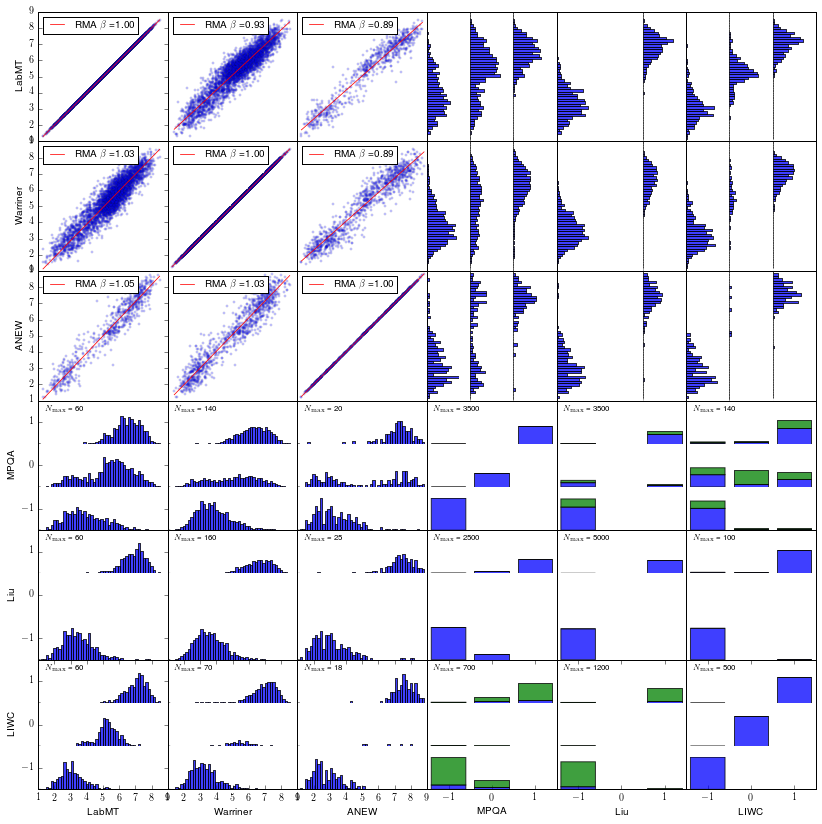

In [119]:
LabMT = sentiDict('LabMT')
Warriner = sentiDict('Warriner')
ANEW = sentiDict('ANEW')
MPQA = sentiDict('MPQA')
Liu = sentiDict('Liu')
Liutrie = sentiDict('Liu',datastructure='marisatrie')
fig = plt.figure(figsize=(12, 12))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
compList = ['LabMT','Warriner','ANEW','MPQA','Liu','LIWC']
dataList = [LabMT.data,Warriner.data,ANEW.data,MPQAtrie.data,Liutrie.data,LIWCtrie.data]
types = ['full','full','full','integer','integer','integer']
# this will be 2x2
plotsize = len(compList)-1
# whole figure label padding
xpad = .07
ypad = .07
xpadr = .03
ypadr = .03
# remaining width
xrem = 1.-xpad-xpadr
yrem = 1.-ypad-ypadr
# divide it up
xwidth = xrem/(plotsize+1)
ywidth = xrem/(plotsize+1)
# go down
for i in range(0,plotsize+1):
    for j in range(0,plotsize+1):
        print(i,j)
        print(compList[j],compList[i])
        print(types[j],types[i])
        rect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth,xwidth,ywidth]
        print(rect)
        if types[j] == 'full' and types[i] == 'full':
            ax = fig.add_axes(rect)
            scatter2(dataList[j],dataList[i],ax)
        elif types[j] == 'full' and types[i] == 'integer':
            # take the rectangle, divide into three vertically
            ax = fig.add_axes(rect)
            if i == plotsize:
                ax.set_xlim([1,9])
                ax.set_xlabel(compList[j])
            else:
                ax.set_xticks([])
            ax.set_yticks([])
            negrect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth,xwidth,ywidth/4.]
            neurect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth+ywidth/3.,xwidth,ywidth/4.]
            posrect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth+2*ywidth/3.,xwidth,ywidth/4.]
            axlist = (fig.add_axes(negrect,frame_on=False),fig.add_axes(neurect,frame_on=False),fig.add_axes(posrect,frame_on=False))
            print('using scatter7')
            # print(rectlist)
            maxylim = scatter7(dataList[j],dataList[i],axlist)
            ax.text(0.05, 0.95, '$N_{{\max}}$ = {0:.0f}'.format(maxylim), transform=ax.transAxes, fontsize=8,
                verticalalignment='top', bbox=None)
        elif types[j] == 'integer' and types[i] == 'full':
            # take the rectangle, divide into three vertically
            ax = fig.add_axes(rect)
            if i == plotsize:
                ax.set_xlim([1,9])
                ax.set_xlabel(compList[j])
            else:
                ax.set_xticks([])
            ax.set_yticks([])
            negrect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth,xwidth/4.,ywidth]
            neurect = [xpad+j*xwidth+xwidth/3.,ypad+(plotsize-i)*ywidth,xwidth/4.,ywidth]
            posrect = [xpad+j*xwidth+2*xwidth/3.,ypad+(plotsize-i)*ywidth,xwidth/4.,ywidth]
            axlist = (fig.add_axes(negrect,frame_on=False),fig.add_axes(neurect,frame_on=False),fig.add_axes(posrect,frame_on=False))
            print('using scatter7')
            # print(rectlist)
            maxylim = scatter7(dataList[i],dataList[j],axlist,orientation='horizontal')
            # ax.text(0.05, 0.95, 'Max = {0:.0f}'.format(maxylim), transform=ax.transAxes, fontsize=10,
            #    verticalalignment='top', bbox=None)
        elif types[j] == 'integer' and types[i] == 'integer':
            # take the rectangle, divide into three vertically
            ax = fig.add_axes(rect)
            if i == plotsize:
                # ax.set_xlim([1,9])
                ax.set_xlabel(compList[j])
                ax.set_xlim([-1.5,1.5])
                ax.set_xticks([-1,0,1])
            else:
                ax.set_xticks([])
            ax.set_yticks([])
            negrect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth,xwidth,ywidth/4.]
            neurect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth+ywidth/3.,xwidth,ywidth/4.]
            posrect = [xpad+j*xwidth,ypad+(plotsize-i)*ywidth+2*ywidth/3.,xwidth,ywidth/4.]
            axlist = (fig.add_axes(negrect,frame_on=False),fig.add_axes(neurect,frame_on=False),fig.add_axes(posrect,frame_on=False))
            print('using scatter6')
            # print(rectlist)
            maxylim = scatter6(dataList[j],dataList[i],axlist)
            ax.text(0.05, 0.95, '$N_{{\max}}$ = {0:.0f}'.format(maxylim), transform=ax.transAxes, fontsize=8,
                verticalalignment='top', bbox=None)
        if j == 0:
            ax.set_ylabel(compList[i])
            if types[i] == 'full':
                ax.set_ylim([1,9])
                ax.set_yticks(range(1,10))
            if types[i] == 'integer':
                ax.set_ylim([-1.5,1.5])
                ax.set_yticks([-1,0,1])
mysavefig('scatter-{0}.pdf'.format('-'.join(compList)))